In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

print("依赖库已导入")

依赖库已导入


In [14]:
# 文件路径
sentence_validity_file = "../outputs/sentence_validity.json"
descriptions_file = "../outputs/descriptions.json"
image_dir = "../images/"

# 检查文件是否存在
if not os.path.exists(sentence_validity_file):
    raise FileNotFoundError(f"未找到 {sentence_validity_file}")
if not os.path.exists(descriptions_file):
    raise FileNotFoundError(f"未找到 {descriptions_file}")

print(f"文件路径已设置：\n- 句子验证: {sentence_validity_file}\n- 描述: {descriptions_file}\n- 图片目录: {image_dir}")

文件路径已设置：
- 句子验证: ../outputs/sentence_validity.json
- 描述: ../outputs/descriptions.json
- 图片目录: ../images/


In [15]:
# 加载句子验证数据
with open(sentence_validity_file, "r", encoding="utf-8") as f:
    sentence_validity = json.load(f)

# 加载描述数据
with open(descriptions_file, "r", encoding="utf-8") as f:
    descriptions = json.load(f)

# 转换为字典，方便查找
desc_dict = {item["image"]: item["description"] for item in descriptions}

# 过滤错误句子 (is_valid: false)
false_sentences = [item for item in sentence_validity if not item["is_valid"]]

# 统计信息
total_sentences = len(sentence_validity)
false_count = len(false_sentences)
print(f"总句子数: {total_sentences}")
print(f"错误句子数: {false_count}")
print(f"错误率: {false_count / total_sentences:.2%}")

总句子数: 817
错误句子数: 38
错误率: 4.65%


In [16]:
# 按图片分组
false_by_image = {}
for item in false_sentences:
    img_path = item["image"]
    if img_path not in false_by_image:
        false_by_image[img_path] = []
    false_by_image[img_path].append(item["sentence"])

# 转换为 DataFrame
df_false = pd.DataFrame([
    {"image": img_path, "false_sentences": sentences}
    for img_path, sentences in false_by_image.items()
])
df_false["description"] = df_false["image"].map(desc_dict)

# 显示前几行
print(f"错误图片数: {len(df_false)}")
display(df_false[["image", "description", "false_sentences"]].head())

错误图片数: 31


image  \
0  ./images/train2017/000000363489.jpg   
1  ./images/train2017/000000065859.jpg   
2  ./images/train2017/000000366430.jpg   
3  ./images/train2017/000000574675.jpg   
4  ./images/train2017/000000437391.jpg   

                                         description  \
0  The image captures an outdoor scene featuring ...   
1  The image depicts a tranquil urban scene at wh...   
2  The image captures a scene on a street where t...   
3  The image depicts an indoor setting where two ...   
4  The image depicts a section of a bathroom feat...   

                                     false_sentences  
0  [This dog is positioned on all fours, facing t...  
1  [The train's windows reflect the muted light o...  
2  [The passenger, dressed in a black jacket and ...  
3    [Both are focused on their respective screens.]  
4  [The image depicts a section of a bathroom fea...

/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


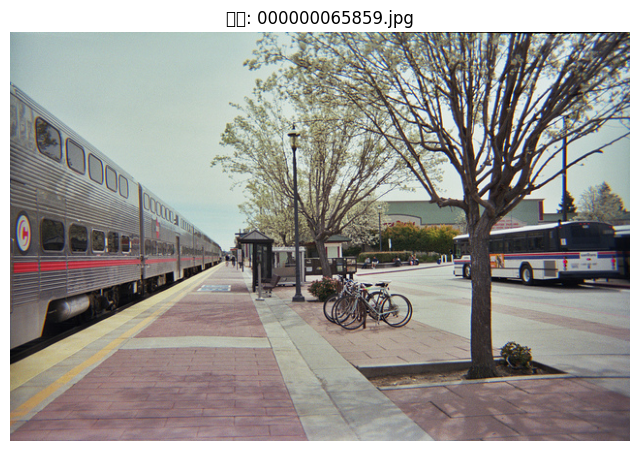

完整描述: The image depicts a tranquil urban scene at what appears to be a train station platform. On the left side of the frame, a passenger train is stationed, with its silver exterior featuring a red stripe running horizontally along the bottom. The train's windows reflect the muted light of an overcast sky, suggesting a cool or temperate climate. The platform itself is composed of reddish-brown bricks, bordered by a yellow safety line that runs parallel to the edge of the platform. A few individuals can be seen in the distance near the train, likely passengers either boarding or disembarking. To the right of the platform, there is a paved area where bicycles are parked against a tree. The tree, which has sparse green foliage, stands prominently in the foreground, casting a shadow on the ground. Behind it, a bus is visible, parked on the street, indicating the presence of public transportation services. The bus has a white body with blue and orange accents, typical of many transit syste

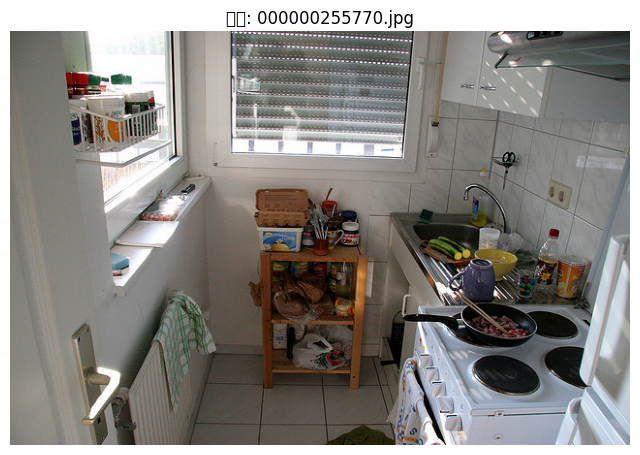

完整描述: The image depicts a compact kitchen with a functional layout. The space is well-lit by natural light streaming through two windows, one of which has horizontal blinds partially drawn. The left window has a small shelf holding various containers, possibly for storage or cooking ingredients. Below this window, there is a radiator with a green and white checkered towel draped over it. On the right side of the image, a wooden shelving unit stands against the wall. It holds an assortment of items, including a carton of eggs, jars, and other kitchen supplies. The shelves appear to be organized but slightly cluttered, suggesting regular use. In the foreground, a stove with four burners is visible. A pot sits on one burner, containing what appears to be food being cooked. Chopsticks rest on top of the pot, indicating that someone might have been actively cooking at the time the photo was taken.
错误句子:
- On the right side of the image, a wooden shelving unit stands against the wall.
------

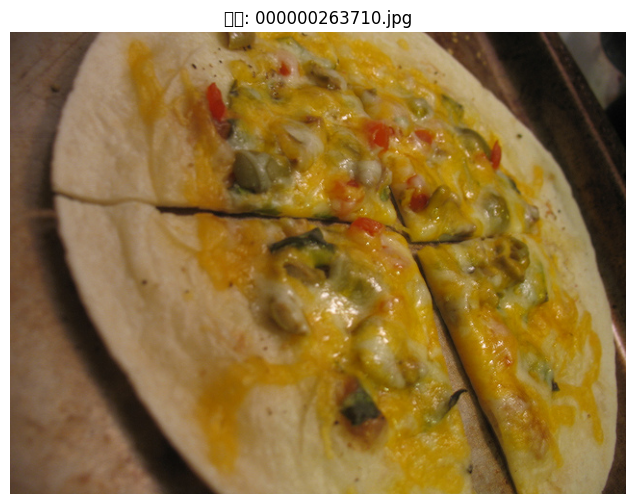

完整描述: The image depicts a close-up view of a freshly prepared dish that appears to be a type of stuffed flatbread or pizza. The flatbread is cut into two triangular sections, revealing its filling. The filling consists of melted cheese, which has a golden-yellow hue, suggesting it might be cheddar or a similar variety. Interspersed within the cheese are visible pieces of green bell peppers and red bell peppers, adding color contrast and likely a sweet and slightly tangy flavor profile. Additionally, there appear to be small chunks of what could be jalapeños or another type of green pepper, contributing a potential spicy element to the dish. The flatbread itself looks soft and pliable, with a pale beige color indicating it may have been lightly toasted or baked. The surface of the flatbread shows some browning, particularly around the edges where it has been cooked more intensely.
错误句子:
- The flatbread is cut into two triangular sections, revealing its filling.
-------------------------

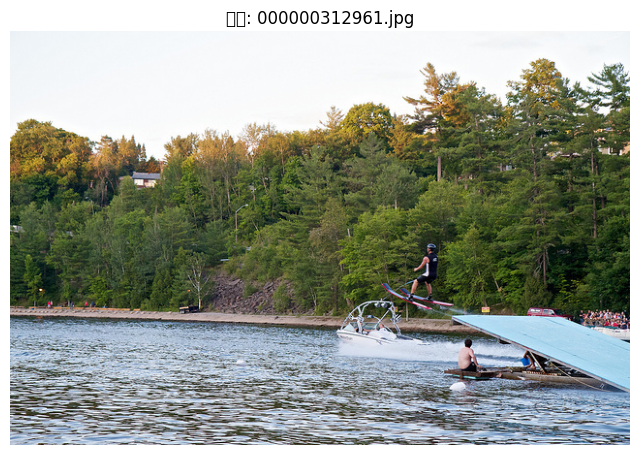

完整描述: The image captures an outdoor recreational scene at a lakeside location during what appears to be late afternoon or early evening, as suggested by the soft lighting and long shadows. The foreground features a body of water with gentle ripples, reflecting the light from the sky. A person is engaged in a waterskiing activity, performing a jump off a ramp that is attached to a boat. The skier is airborne, with their skis angled upwards, indicating the peak of the jump. The individual is wearing a dark-colored life vest for safety. In the background, there is a shoreline lined with dense greenery, consisting primarily of coniferous trees, which suggests a forested area. The trees are lush and appear to be in full foliage, indicating it might be summer or early autumn. There are a few structures visible on the far shore, possibly houses or cabins, nestled among the trees.
错误句子:
- The individual is wearing a dark-colored life vest for safety.
-------------------------------------------

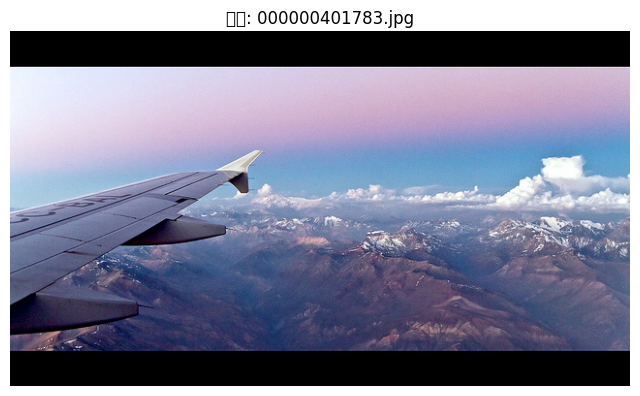

完整描述: The image captures an aerial view from an airplane window, showcasing a serene landscape below. The foreground prominently features the wing of the aircraft, which is angled slightly upward, indicating the plane's ascent or cruising altitude. The wing's metallic surface reflects the ambient light, adding a sense of depth to the scene. Below the wing, a vast expanse of rugged mountains stretches across the horizon. The mountains exhibit a mix of earthy tones, with some peaks appearing darker, possibly due to shadowing or vegetation, while others are lighter, suggesting snow or bare rock. The terrain is uneven, with valleys and ridges creating a textured appearance that adds dynamism to the landscape. In the distance, the mountains merge into a layer of clouds, which are fluffy and white, contrasting sharply with the blue sky above. The sky itself transitions from a soft pink near the horizon to a deeper blue higher up, hinting at either sunrise or sunset.
错误句子:
- The wing's metall

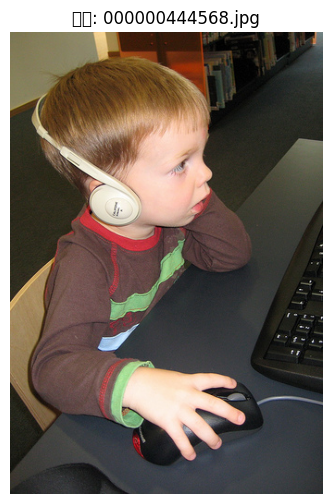

完整描述: The image depicts a young child engaged with a computer setup. The child is wearing headphones and appears to be focused on the screen of a laptop. The child's hands are positioned on a computer mouse, suggesting active interaction with the device. The child is dressed in a long-sleeved shirt with a green and brown pattern. The setting seems to be an indoor environment, possibly a library or a classroom, as indicated by the presence of bookshelves in the background. The child's posture and expression convey concentration and curiosity, indicating engagement with the activity at hand. The overall scene suggests a learning or recreational activity involving technology.
错误句子:
- The child is wearing headphones and appears to be focused on the screen of a laptop.
--------------------------------------------------


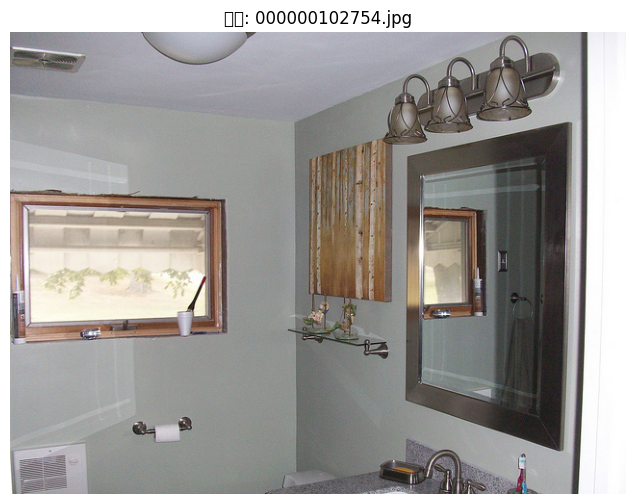

完整描述: The image depicts a well-maintained bathroom interior. The walls are painted in a light sage green color, creating a serene atmosphere. A rectangular window with a wooden frame is positioned on the left wall, allowing natural light to filter into the room. The window has a frosted glass panel, which diffuses the light and provides privacy. On the right side of the image, there is a large mirror with a dark brown frame, reflecting part of the room's interior. Above the mirror, a set of four silver sconces with frosted glass shades is mounted on the wall, providing illumination for the space. Below the mirror, a modern sink with a chrome faucet is installed on a countertop that appears to be made of gray granite or a similar material. To the left of the sink, a toilet paper holder is mounted on the wall, holding a roll of white toilet paper.
错误句子:
- The window has a frosted glass panel, which diffuses the light and provides privacy.
-------------------------------------------------

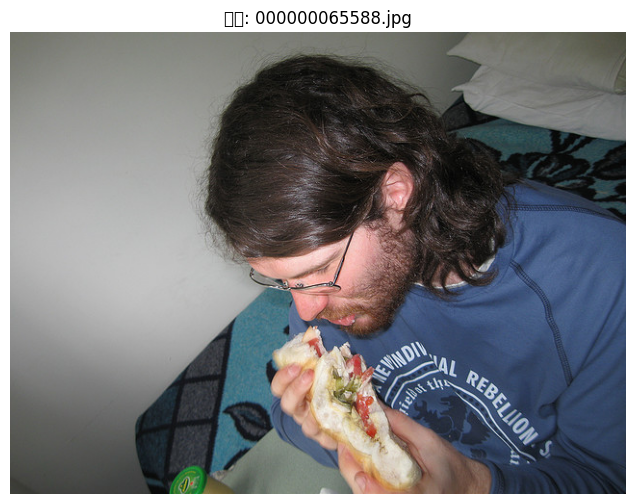

完整描述: The image depicts an individual engaged in the act of eating a sandwich. The person is wearing glasses and a blue long-sleeved shirt with text that reads "ANONYMOUS REBELLION." The individual's hair appears to be dark and slightly disheveled, suggesting a casual or relaxed setting. The sandwich being consumed contains visible ingredients such as lettuce and possibly tomato, indicating it might be a vegetarian or vegan option. The background includes a patterned fabric, likely a bedspread, and a pillow, which suggests the setting could be a bedroom or a similar private space. The overall atmosphere of the image conveys a sense of informality and comfort.
错误句子:
- The sandwich being consumed contains visible ingredients such as lettuce and possibly tomato, indicating it might be a vegetarian or vegan option.
--------------------------------------------------


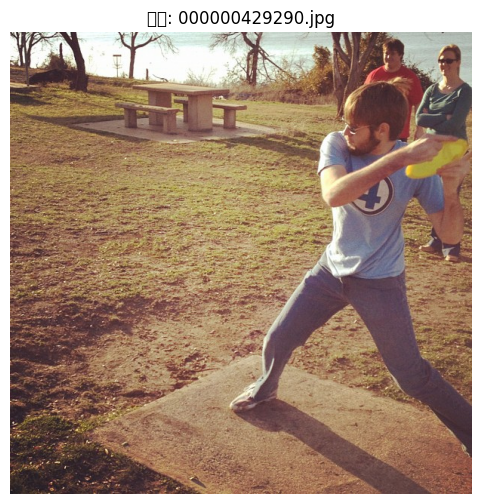

完整描述: The image captures an outdoor recreational scene at what appears to be a park or open field. In the foreground, a man is in the midst of throwing a yellow frisbee with considerable force. He is wearing a light blue t-shirt with a circular logo on the front, paired with gray pants. His posture suggests he is fully engaged in the activity, with his body leaning forward and his arm extended behind him. In the background, two other individuals are visible. One person, dressed in red, stands near a picnic table, seemingly observing the action. Another individual, wearing a green top and sunglasses, is positioned further back, also appearing to watch the frisbee thrower. The picnic table is situated on a grassy area, surrounded by trees that provide a natural backdrop to the scene. The ground is a mix of grass and dirt, indicating a casual, informal setting typical of a park environment.
错误句子:
- He is wearing a light blue t-shirt with a circular logo on the front, paired with gray pant

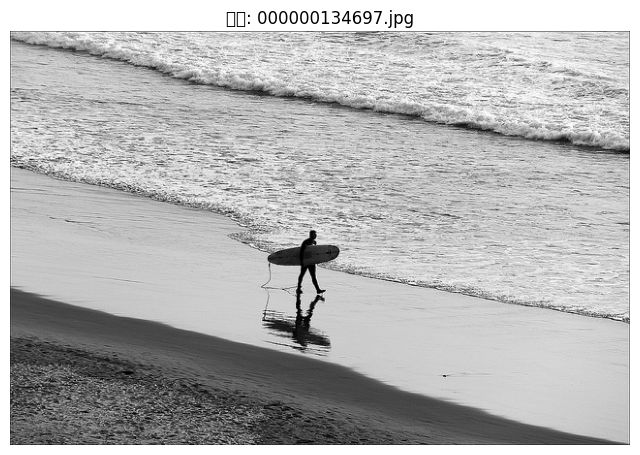

完整描述: The image is a black-and-white photograph capturing a solitary figure on a beach. The individual, silhouetted against the light, is walking along the shoreline with a surfboard under their arm. The surfboard is positioned horizontally across the person's body, suggesting they have just finished surfing or are heading towards the water to do so. The person appears to be wearing a wetsuit, which is typical attire for surfing activities. The beach is wet, reflecting the person and the surfboard, creating a mirror-like effect that enhances the monochromatic aesthetic of the photograph. The waves in the background are in motion, with white foam cresting at the top, indicating the dynamic nature of the ocean. The sand is dark and textured, contrasting with the lighter tones of the water and the reflection. The overall mood of the image is serene and contemplative. The lone figure against the vastness of the sea evokes a sense of solitude and introspection.
错误句子:
- The surfboard is posi

In [17]:
import random
# 设置显示参数
max_display = 10  # 最多显示 10 张图片
plt.rcParams["figure.figsize"] = (8, 6)

# 打乱顺序
df_false = df_false.sample(frac=1).reset_index(drop=True)

# 按图片显示错误
for idx, row in df_false.iterrows():
    if idx >= max_display:
        print(f"已显示 {max_display} 张图片，停止")
        break
    
    img_path = row["image"]
    description = row["description"]
    false_sentences = row["false_sentences"]
    
    # 检查图片是否存在
    full_img_path = '.' + img_path  # 路径已包含 images/
    if not os.path.exists(full_img_path):
        print(f"图片不存在: {full_img_path}")
        continue
    
    # 加载并显示图片
    img = Image.open(full_img_path)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"图片: {os.path.basename(img_path)}")
    plt.show()
    
    # 显示描述和错误句子
    print(f"完整描述: {description}")
    print("错误句子:")
    for sent in false_sentences:
        print(f"- {sent}")
    print("-" * 50)

In [ ]:
# 统计错误句子长度
df_false["sentence_count"] = df_false["false_sentences"].apply(len)
print("每张图片的错误句子数统计:")
print(df_false["sentence_count"].describe())

# 提取所有错误句子
all_false_sentences = [sent for sentences in df_false["false_sentences"] for sent in sentences]

# 计算句子长度
sentence_lengths = [len(sent.split()) for sent in all_false_sentences]
plt.figure()
plt.hist(sentence_lengths, bins=20)
plt.title("错误句子长度分布")
plt.xlabel("词数")
plt.ylabel("频率")
plt.show()

# 简单词频分析（可选）
from collections import Counter
words = [word.lower() for sent in all_false_sentences for word in sent.split()]
word_freq = Counter(words)
print("错误句子中最常见的 10 个词:")
print(word_freq.most_common(10))